In [37]:
#!pip install investpy
#!pip install yfinance
#!pip install quandl
#!pip install sweetviz

In [38]:
import pandas as pd
import numpy as np
import matplotlib as plt

---
### yfinance

In [22]:
import yfinance as yf

In [40]:
msft = yf.download('MSFT',start='2022-01-01')

[*********************100%***********************]  1 of 1 completed


In [45]:
msft.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,335.350006,338.000000,329.779999,334.750000,330.092285,28865100
2022-01-04,334.829987,335.200012,326.119995,329.010010,324.432159,32674300
2022-01-05,325.859985,326.070007,315.980011,316.380005,311.977875,40054300
2022-01-06,313.149994,318.700012,311.489990,313.880005,309.512634,39646100
2022-01-07,314.149994,316.500000,310.089996,314.040009,309.670410,32720000


In [46]:
type(msft)

pandas.core.frame.DataFrame

In [49]:
msft_ohlc = msft[['Open','High','Low','Close']]
msft_ohlc.head()

,Open,High,Low,Close
Date,,,,
2022-01-03,335.350006,338.000000,329.779999,334.750000
2022-01-04,334.829987,335.200012,326.119995,329.010010
2022-01-05,325.859985,326.070007,315.980011,316.380005
2022-01-06,313.149994,318.700012,311.489990,313.880005
2022-01-07,314.149994,316.500000,310.089996,314.040009


In [50]:
abev = yf.download('ABEV3.SA',start='2022-01-01')

[*********************100%***********************]  1 of 1 completed


In [51]:
abev_ohlc = abev[['Open','High','Low','Close']]
abev_ohlc.head()

,Open,High,Low,Close
Date,,,,
2022-01-03,15.42,15.54,15.15,15.33
2022-01-04,15.32,15.40,15.04,15.31
2022-01-05,15.25,15.29,14.96,15.01
2022-01-06,15.04,15.06,14.66,14.77
2022-01-07,14.80,14.80,14.45,14.53


- exportar arquivo .csv

In [55]:
abev_ohlc.to_csv('ambev.csv',sep=';',decimal=',')

- ler aquivo .csv com formato OHLC

In [73]:
ambev = pd.read_csv('ambev.csv',sep=';',decimal=',')

In [71]:
ambev.head()

,Date,Open,High,Low,Close
0,2022-01-03,15.42,15.54,15.15,15.33
1,2022-01-04,15.32,15.40,15.04,15.31
2,2022-01-05,15.25,15.29,14.96,15.01
3,2022-01-06,15.04,15.06,14.66,14.77
4,2022-01-07,14.80,14.80,14.45,14.53


- transformar date de objeto para datetime 

In [76]:
ambev['Date'] = pd.to_datetime(ambev['Date'])

In [77]:
type(ambev.index)

pandas.core.indexes.range.RangeIndex

In [78]:
ambev.set_index('Date', inplace=True)

In [79]:
ambev.head()

,Open,High,Low,Close
Date,,,,
2022-01-03,15.42,15.54,15.15,15.33
2022-01-04,15.32,15.40,15.04,15.31
2022-01-05,15.25,15.29,14.96,15.01
2022-01-06,15.04,15.06,14.66,14.77
2022-01-07,14.80,14.80,14.45,14.53


<Axes: xlabel='Date'>

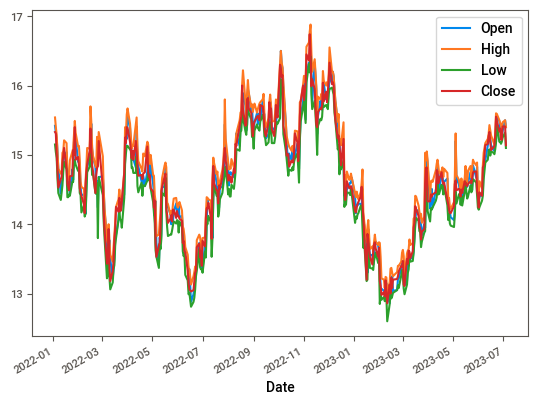

In [80]:
ambev.plot()

In [81]:
type(ambev.index)

pandas.core.indexes.datetimes.DatetimeIndex

- Merge de dados no formato OHLC

In [82]:
petr4 = yf.download('PETR4.SA',start='2022-07-01',end='2023-07-01')
lren3 = yf.download('LREN3.SA',start='2022-07-01',end='2023-07-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [83]:
petr4.rename(columns={'Adj Close':'PETR4'}, inplace=True)

In [84]:
lren3.rename(columns={'Adj Close':'LREN3'}, inplace=True)

In [85]:
df = pd.merge(lren3,petr4, how='inner', on='Date')

In [86]:
new_df = df[['LREN3','PETR4']]

In [87]:
new_df.head()

,LREN3,PETR4
Date,,
2022-07-01,22.323061,16.979118
2022-07-04,22.255415,17.342148
2022-07-05,22.313396,16.681551
2022-07-06,23.057499,16.467304
2022-07-07,23.917564,16.949362


---
### sweetviz

In [32]:
import sweetviz as sv

In [35]:
relatorio = sv.analyze(new_df)

C:\Users\Victor\AppData\Roaming\Python\Python310\site-packages\sweetviz\dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
C:\Users\Victor\AppData\Roaming\Python\Python310\site-packages\sweetviz\dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

C:\Users\Victor\AppData\Roaming\Python\Python310\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
C:\Users\Victor\AppData\Roaming\Python\Python310\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()


In [36]:
relatorio.show_html('Relatorio_PETR4_LREN3.html')

Report Relatorio_PETR4_LREN3.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
